#Build & Train a Tiny Neural Network From Scratch (No Libraries)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1COa2Dc0St327gKyk3ar6XLqWvvWlOprL"
filename = "xor_dataset.csv"
#Download file
urllib.request.urlretrieve(url, filename)
#Load data (x,y,z)
data = np.loadtxt(filename, delimiter=",", skiprows=1)

In [ ]:
X = data[:, :2]     #inputs: x and y
y = data[:, 2:3]    #labels: z

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
np.random.seed(42)
W1 = np.random.randn(2, 2)
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1)
b2 = np.zeros((1, 1))

learning_rate = 0.005
epochs = 200
losses = []

In [ ]:
for epoch in range(epochs):
    #Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y - y_hat) ** 2)
    losses.append(loss)

    #Backpropagation
    d_y_hat = y_hat - y
    d_z2 = d_y_hat * sigmoid_derivative(y_hat)

    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)

    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    #Update
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

In [ ]:
preds = (y_hat > 0.5).astype(int)
accuracy = np.mean(preds == y)
print("Training accuracy:", accuracy)


Training accuracy: 1.0


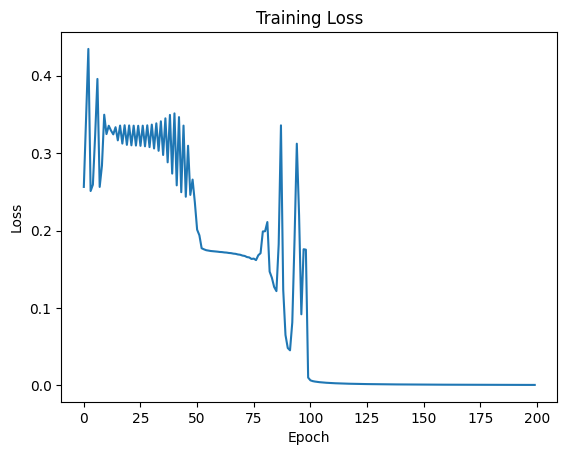

In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [ ]:
print("Sample Results:")
print(np.hstack((X[:10], y[:10], np.round(y_hat[:10], 3))))

Sample Results:
[[0.    0.    0.    0.025]
 [0.    1.    1.    0.987]
 [1.    1.    0.    0.019]
 [1.    1.    0.    0.019]
 [0.    0.    0.    0.025]
 [1.    0.    1.    0.965]
 [1.    1.    0.    0.019]
 [1.    1.    0.    0.019]
 [0.    1.    1.    0.987]
 [1.    0.    1.    0.965]]
